In [1]:
import pandas as pd

In [3]:
input_csv = "../data/car_t_mrna_dataset.csv"
df = pd.read_csv(input_csv)

df.head()

,Unnamed: 0,ires,name,gene_symbol,protein_family,functional_category,ires_sequence,cds_sequence,protein_sequence,gene_info_id,...,sequence_description,lineage,superkingdom,kingdom,phylum,class,order,family,genus,species
0,0,targeting,CD19,CD19,CD_molecule,B_cell_target,AAGCTGGGTGCCCCGGAGAGTCTGACCACCATGCCACCTCCTCGCC...,ATGCCACCTCCTCGCCTCCTCTTCTTCCTCCTCTTCCTCACCCCCA...,NaN,930.0,...,"PREDICTED: Homo sapiens CD19 molecule (CD19), ...",Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Eukaryota,Metazoa,Chordata,Mammalia,Primates,Hominidae,Homo,Homo sapiens
1,1,targeting,CD20,MS4A1,CD_molecule,B_cell_target,ACTCACCCTCCCAGTGTGCTTGAGAAACAAACTGCACCCACTGAAC...,ATGACAACACCCAGAAATTCAGTAAATGGGACTTTCCCGGCAGAGC...,NaN,931.0,...,Homo sapiens membrane spanning 4-domains A1 (M...,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Eukaryota,Metazoa,Chordata,Mammalia,Primates,Hominidae,Homo,Homo sapiens
2,2,targeting,CD22,CD22,CD_molecule,B_cell_target,AGATGCTGCCAGGGTCCCTGAAGAGGGAAGACACGCGGAAACAGGC...,ATGCATCTCCTCGGCCCCTGGCTCCTGCTCCTGGTTCTAGAATACT...,NaN,933.0,...,"Homo sapiens CD22 molecule (CD22), transcript ...",Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Eukaryota,Metazoa,Chordata,Mammalia,Primates,Hominidae,Homo,Homo sapiens
3,3,targeting,BCMA,TNFRSF17,TNFR_superfamily,B_cell_target,ATTGTTCTCAACATTCTAGCTGCTCTTGCTGCATTTGCTCTGGAAT...,ATGTTGCAGATGGCTGGGCAGTGCTCCCAAAATGAATATTTTGACA...,NaN,608.0,...,Homo sapiens TNF receptor superfamily member 1...,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Eukaryota,Metazoa,Chordata,Mammalia,Primates,Hominidae,Homo,Homo sapiens
4,4,targeting,CD79A,CD79A,unknown,B_cell_target,CAAACTAACCAACCCACTGGGAGAAGATGCCTGGGGGTCCAGGAGT...,ATGCCTGGGGGTCCAGGAGTCCTCCAAGCTCTGCCTGCCACCATCT...,NaN,973.0,...,"Homo sapiens CD79a molecule (CD79A), transcrip...",Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Eukaryota,Metazoa,Chordata,Mammalia,Primates,Hominidae,Homo,Homo sapiens


In [7]:
#!/usr/bin/env python3
"""
Generate protein_family.npy file for UMAP visualization
"""
import pandas as pd
import numpy as np
import os
import umap

# Edit these variables
input_csv = "../data/car_t_mrna_dataset.csv"
output_file = "/Users/brik/Projects/ML/CodonBERT/output/protein_family.npy"
embedding_file = "/Users/brik/Projects/ML/CodonBERT/output/car-t.npy"

# Load the embedding to check its size
embedding_data = np.load(embedding_file, allow_pickle=True)
embedding_length = len(embedding_data)
print(f"Embedding has {embedding_length} entries")

# Read CSV file
print(f"Reading {input_csv}...")
df = pd.read_csv(input_csv)

# Extract protein family column - ensure it's the same length as embedding
if len(df) != embedding_length:
    print(f"WARNING: CSV has {len(df)} rows but embedding has {embedding_length} entries")
    print("Attempting to truncate protein_family to match embedding length")
    if len(df) > embedding_length:
        # Truncate to match embedding size
        df = df.iloc[:embedding_length]
    else:
        print("ERROR: CSV has fewer entries than embedding - cannot align")
        exit(1)

# Extract protein family column
protein_family = df['protein_family'].values

# Double-check alignment
print(f"protein_family array has {len(protein_family)} entries")
assert len(protein_family) == embedding_length, "Arrays still misaligned!"

# Save as NPY
np.save(output_file, protein_family)
print(f"Successfully saved {output_file} with {len(protein_family)} entries")

# Print unique protein families for reference
unique_families = pd.Series(protein_family).value_counts()
print("\nProtein family distribution:")
for family, count in unique_families.items():
    print(f"  {family}: {count}")

/opt/homebrew/Caskroom/mambaforge/base/envs/codonbert/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Embedding has 90 entries
Reading ../data/car_t_mrna_dataset.csv...
Attempting to truncate protein_family to match embedding length
protein_family array has 90 entries
Successfully saved /Users/brik/Projects/ML/CodonBERT/output/protein_family.npy with 90 entries

Protein family distribution:
  CD_molecule: 26
  cytokine: 13
  checkpoint: 9
  unknown: 6
  signaling: 6
  TNFR_superfamily: 5
  RTK: 5
  IG_family: 5
  adhesion: 4
  other: 4
  enzyme: 3
  cytokine_receptor: 2
  TCR: 2


In [8]:
data_list = []

data = embedding_data
# Iterate over each sequence in mires
for sequence in data:
    # Compute the mean along the 0th axis
    avg_embedding = np.mean(np.array(sequence), axis=0)
    data_list.append(avg_embedding)

# Convert avg_mires to a numpy array for further processing, just in case
data_list = np.array(data_list)

print("Shape:", data_list.shape)
# This should print Shape of avg_mires of ({number_of_records}, 768) "Hopefully!"

Shape: (90, 768)


In [9]:
data = data_list
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(data)

/opt/homebrew/Caskroom/mambaforge/base/envs/codonbert/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [10]:
embedding.shape

(90, 2)

In [12]:
from collections import Counter
import matplotlib.pyplot as plt

# Load the protein family data
protein_family = np.load("/Users/brik/Projects/ML/CodonBERT/output/protein_family.npy", allow_pickle=True)

# Count the occurrences of each protein family
string_counts = Counter(protein_family)

# Define the occurrence threshold
occurrence_threshold = 3  # Adjust based on your data

# Replace protein families with few occurrences with "other"
filtered_protein_family = [family if string_counts[family] >= occurrence_threshold else "unknown" for family in protein_family]

# Assign colors to protein families
unique_protein_family = np.unique(filtered_protein_family)
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_protein_family)))
protein_family_to_color = {family: color for family, color in zip(unique_protein_family, colors)}
point_colors = np.array([protein_family_to_color.get(family, 'gray') for family in filtered_protein_family])

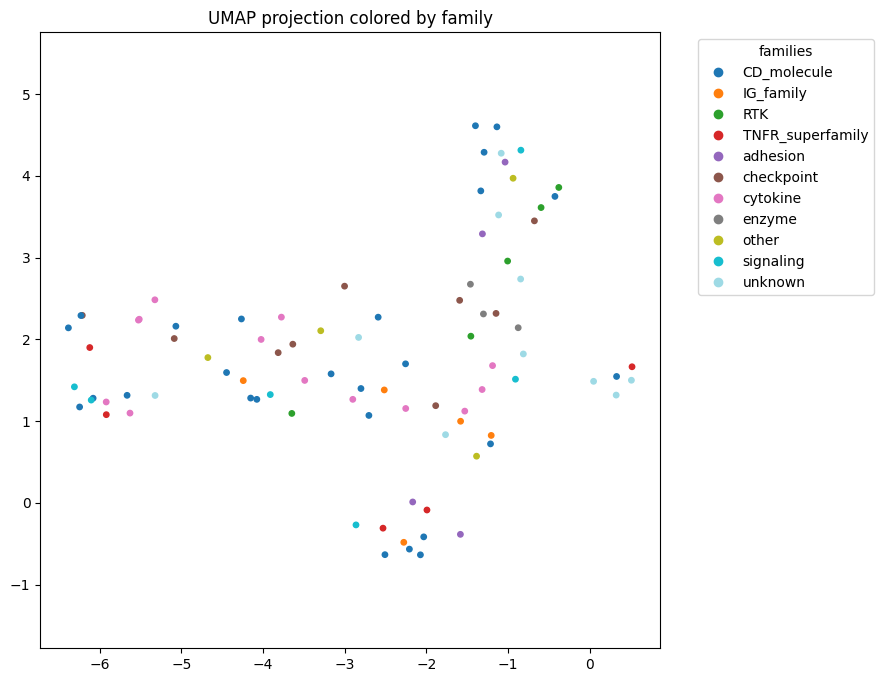

In [13]:
# Now create the scatter plot with colored points
plt.figure(figsize=(8, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=point_colors, s=15)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection colored by family', fontsize=12)

# Create a legend handle for each genus
legend_handles = [plt.Line2D([0], [0], marker='o', color=color, label=genus, linestyle='None')
                  for genus, color in protein_family_to_color.items()]
plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', title='families')

plt.show()